In [1]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import pandas as pd
import re
from sklearn.impute import SimpleImputer
%matplotlib inline

## 1. 读取数据并分析数据

In [2]:
train_data = pd.read_csv("data/data.csv")
test_data = pd.read_csv("data/test.csv")

![]("./imgs/name.png")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()
print("*"*50)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

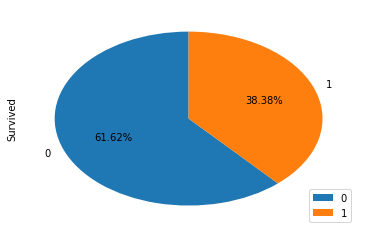

In [8]:
## 绘制饼状图，查看存活情况
train_data.Survived.value_counts().plot.pie(labeldistance = 1.1
                                            , autopct = "%1.2f%%" #显示百分比
                                            , shadow=False
                                            , startangle = 90
                                            , pctdistance = 0.6
                                           )
plt.legend()
plt.show()

## 2.缺失值处理　（连续：均值，离散：众数）

In [9]:
## 填补缺失值
set(train_data.Embarked.values)

{nan, 'C', 'S', 'Q'}

In [10]:
# 登船港口
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
train_data["Cabin"] = train_data.Cabin.fillna("U0")

In [12]:
train_data["Age"][train_data.Age.isnull()] = int(train_data.Age.dropna().mean())

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.560236,13.005010,0.42,22.0000,29.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 3.分析数据之间的关系

### 3.1 性别与是否生存的关系

In [14]:
print(train_data.groupby(["Sex", "Survived"])["Survived"].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [15]:
train_data[["Sex", "Survived"]].groupby(by="Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


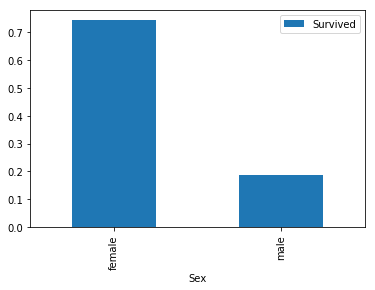

In [16]:
# 查看是否存活情况与男女性别有关，从这里看出体现了女士优先
train_data[["Sex", "Survived"]].groupby(by="Sex").mean().plot.bar()
plt.show()

**结论：**女性生还的可能性大一些，说明性别和生还有一定的联系。

### 3.2船舱等级和生存的关系Pclass

In [17]:
train_data.groupby(["Pclass", "Survived"])["Pclass"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

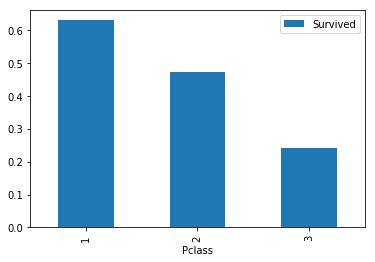

In [18]:
train_data[["Pclass", "Survived"]].groupby("Pclass").mean().plot.bar()
plt.show()

In [19]:
## 不同等级船舱的男女生存率
train_data[["Sex", "Pclass", "Survived"]].groupby(["Pclass", "Sex"]).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

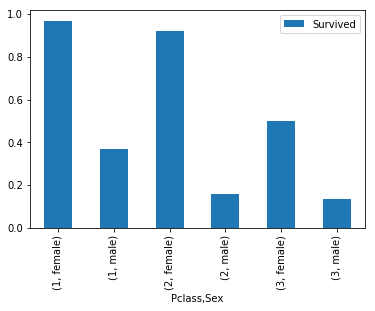

In [20]:
# 分析不同舱体的男女存活比例
train_data[["Sex", "Pclass", "Survived"]].groupby(["Pclass", "Sex"]).mean().plot.bar()
plt.show()

**结论：**不同舱体等级之间的存活情况存在差异性，总体表现出女士优先

### 3.3年龄与存活是否有关系

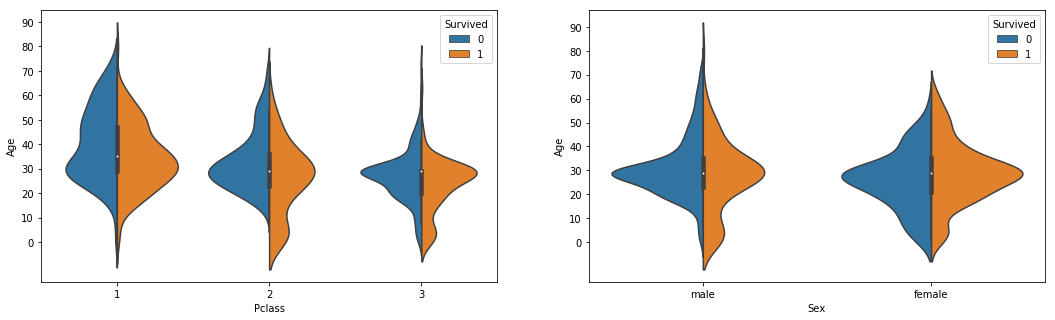

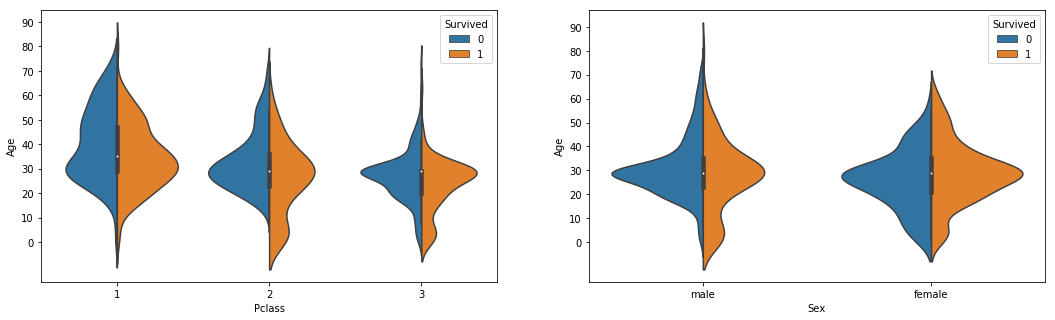

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Pclass", "Age", hue="Survived"
               , data=train_data
               , ax=ax[0]
               , split=True)

ax[1].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived"
               , data=train_data
               , ax=ax[1]
               , split=True)
fig

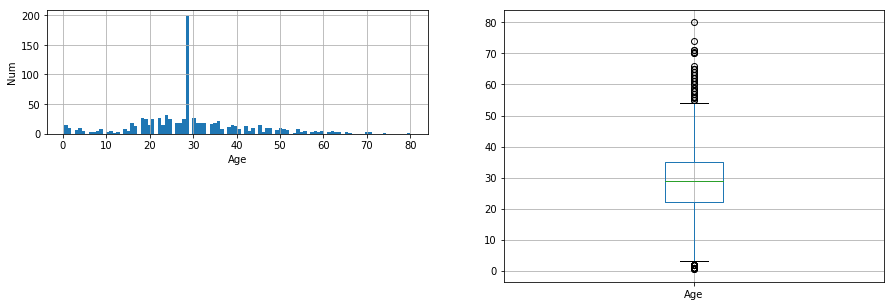

In [22]:
## 年龄的总体分布(主要分布在３０岁左右)
plt.figure(figsize=(15, 5))
plt.subplot(221)
train_data["Age"].hist(bins=100)
plt.xlabel("Age")
plt.ylabel("Num")

plt.subplot(122)
train_data.boxplot(column="Age")

plt.show()

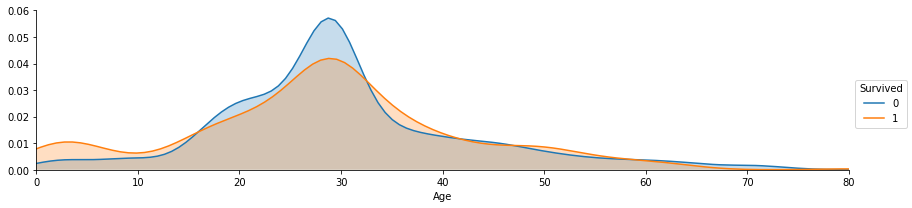

In [23]:
# 绘制不同年龄下生存与不生存之间的关系
facet = sns.FacetGrid(train_data, hue="Survived",  aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim = (0, train_data.Age.max()))
facet.add_legend()
plt.show()

In [24]:
train_data["Age_int"] = train_data["Age"].astype(int)
train_data.Age.describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

样本有891，平均年龄约为30岁，标准差13.5岁，最小年龄0.42，最大年龄80.
按照年龄，将乘客划分为儿童、少年、成年、老年，分析四个群体的生还情况

In [25]:
## 对年龄连续性变量进行分箱
bins = [0, 12, 18, 65, 100]
train_data["Age_group"] = pd.cut(train_data.Age, bins)
by_age = train_data.groupby("Age_group")["Survived"].mean() # 此时groupby的索引为其对象
by_age

Age_group
(0, 12]      0.579710
(12, 18]     0.428571
(18, 65]     0.364247
(65, 100]    0.125000
Name: Survived, dtype: float64

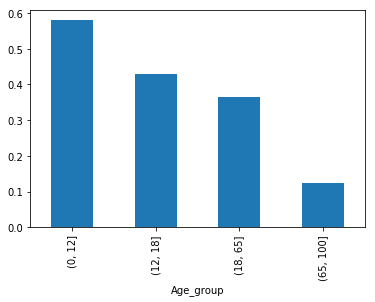

In [26]:
by_age.plot(kind="bar")
plt.show()

**结论：**年龄呈现以生还率呈现一定的相关性，随着年龄的增大，生还率越低

### 3.4 称呼与存活是否有关系

In [27]:
train_data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [28]:
train_data["Title"] = train_data.Name.str.extract("([A-Za-z]+)\.", expand=False)

In [29]:
pd.crosstab(train_data.Title, train_data.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


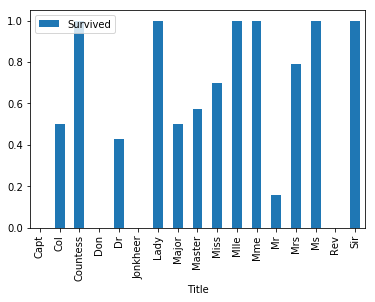

In [30]:
train_data[["Title", "Survived"]].groupby("Title").mean().plot.bar()
plt.show()

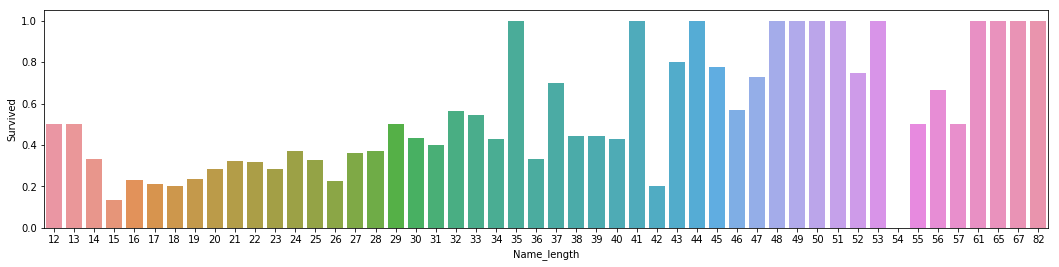

In [31]:
## 名字长度是否对于生存有影响(名字长度与生存有一定的相关性)
fig, axis1 = plt.subplots(1, 1, figsize= (18, 4))
train_data["Name_length"] = train_data["Name"].apply(len)

name_length = train_data[["Name_length", "Survived"]].groupby("Name_length", as_index = False).mean()

sns.barplot(name_length.columns[0], name_length.columns[1], data=name_length)
plt.show()

### 3.5 有无兄弟姐妹和存活与否的关系

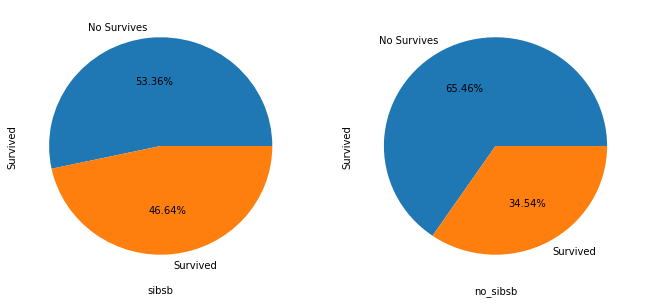

In [32]:
no_sibsp_df = train_data[train_data.SibSp == 0]
sibsp_df = train_data[train_data.SibSp != 0]

plt.figure(figsize=(11, 5))
plt.subplot(121)
sibsp_df.Survived.value_counts().plot.pie(labels = ["No Survives", "Survived"], autopct="%1.2f%%")
plt.xlabel("sibsb")

plt.subplot(122)
no_sibsp_df.Survived.value_counts().plot.pie(labels = ["No Survives", "Survived"], autopct = "%1.2f%%")
plt.xlabel("no_sibsb")
plt.show()

**结论：**从图中可以看出，有兄弟姐妹的人在一定程度，生还几率的可能性大一些

### 3.6 有无父母子女和存活与否的关系

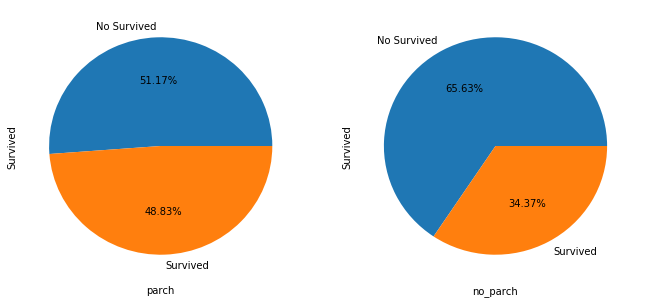

In [33]:
parch_df = train_data[train_data['Parch'] != 0]  
no_parch_df = train_data[train_data['Parch'] == 0]  
 
plt.figure(figsize=(11,5))  
plt.subplot(121)  
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct= '%1.2f%%')  
plt.xlabel('parch')  
 
plt.subplot(122)  
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.2f%%')  
plt.xlabel('no_parch') 
 
plt.show()  

**结论：**有父母子女的存活情况大一些

### 3.7 亲友的人数和存活与否的关系 SibSp & Parch

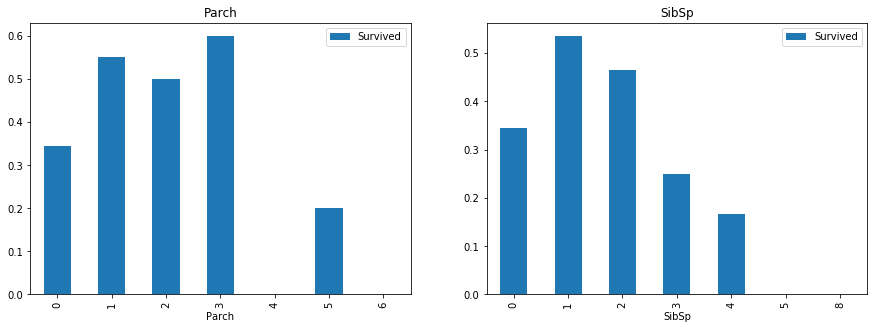

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
train_data[["Parch", "Survived"]].groupby("Parch").mean().plot.bar(ax=ax[0])
ax[0].set_title("Parch")

train_data[["SibSp", "Survived"]].groupby("SibSp").mean().plot.bar(ax=ax[1])
ax[1].set_title("SibSp")
plt.show()

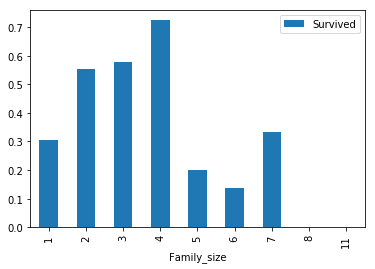

In [35]:
train_data['Family_size'] = train_data['Parch'] + train_data['SibSp']+1
train_data[["Family_size", "Survived"]].groupby("Family_size").mean().plot.bar()
plt.show()

**结论**：独自一人和家属太多都会有可能导致生还率较低

### 3.8　票价分布和存活是否有关系

/home/gavin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


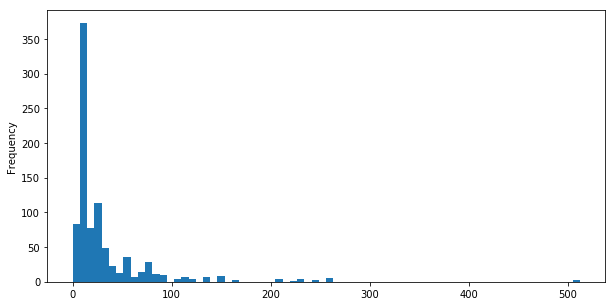

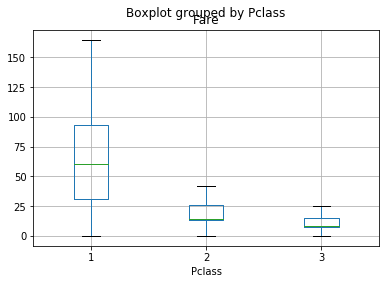

In [36]:
plt.figure(figsize=(10, 5))
train_data.Fare.plot.hist(bins=70)

train_data.boxplot(column="Fare", by = "Pclass", showfliers = False)
plt.show()

In [37]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

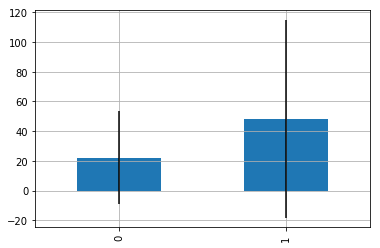

In [38]:
train_data.columns
fare_not_survived  = train_data.Fare[train_data.Survived == 0]
fare_survived = train_data.Fare[train_data.Survived == 1]
averge_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

# 绘制误差图
averge_fare.plot(yerr=std_fare, kind="bar", legend=False)
plt.grid()
plt.show()

### 3.9 船舱类型和存活与否的关系 Cabin

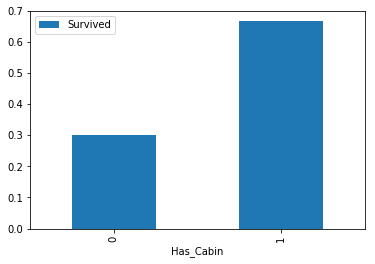

In [39]:
# 将船舱类型的分为有无情况，因为其缺失值较大，不能够分析其与生还率的情况
train_data["Has_Cabin"]  = train_data.Cabin.apply(lambda x : 0 if x=="U0" else 1)
train_data[["Has_Cabin", "Survived"]].groupby("Has_Cabin").mean().plot.bar()
plt.show()

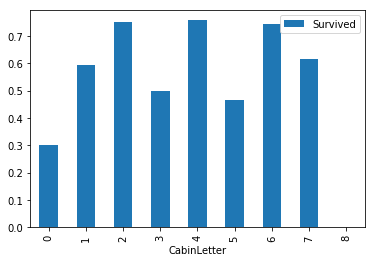

In [40]:
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()
# plt.show()

**结论：**不同船舱的生还率不同，但是差别不大，可以不考虑

### 3.10 港口和存活与否的关系 Embarked

Text(0.5,1,'Embarked and Survived')

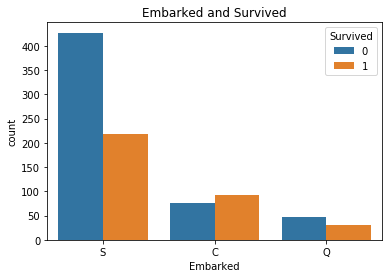

In [41]:
sns.countplot(x="Embarked", hue="Survived", data=train_data)
plt.title("Embarked and Survived")

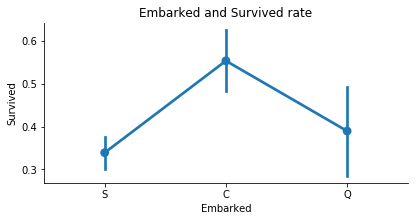

In [42]:
# TODO:熟悉该函数
sns.factorplot('Embarked','Survived',data = train_data, size=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

## ４．变量装换
目的：将数据装换为使用与模型使用的数据

### 4.1　哑变量

In [43]:
embark_dummies = pd.get_dummies(train_data.Embarked)
# 删除原有数据
train_data.head()
train_data = train_data.join(embark_dummies)

In [44]:
train_data.drop(["Embarked"], axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_int,Age_group,Title,Name_length,Family_size,Has_Cabin,CabinLetter,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22,"(18, 65]",Mr,23,2,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38,"(18, 65]",Mrs,51,2,1,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26,"(18, 65]",Miss,22,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35,"(18, 65]",Mrs,44,2,1,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35,"(18, 65]",Mr,24,1,0,0,0,0,1


In [45]:
embark_dummies = train_data[["S", "C", "Q"]]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


### 4.2 Factoring

In [46]:
train_data.Cabin.unique()

array(['U0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [47]:
train_data.Cabin[train_data.Cabin.isnull()] = "U0"

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
# 获得每一个字母的首先
train_data["CabinLetter"] = train_data.Cabin.map(lambda X:re.compile("([a-zA-Z])").search(X).group())

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_int,Age_group,Title,Name_length,Family_size,Has_Cabin,CabinLetter,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22,"(18, 65]",Mr,23,2,0,U,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38,"(18, 65]",Mrs,51,2,1,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26,"(18, 65]",Miss,22,1,0,U,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35,"(18, 65]",Mrs,44,2,1,C,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35,"(18, 65]",Mr,24,1,0,U,0,0,1


In [50]:
train_data.CabinLetter = pd.factorize(train_data.CabinLetter)[0]


In [51]:
train_data[['Cabin', "CabinLetter"]].head()

,Cabin,CabinLetter
0,U0,0
1,C85,1
2,U0,0
3,C123,1
4,U0,0


### 4.3　Scaling

In [52]:
from sklearn import preprocessing

assert np.size(train_data.Age) == 891
scaler =preprocessing.StandardScaler()

# 特征必须是二维的数据类型
train_data["Age_scaled"] = scaler.fit_transform(train_data.Age.values.reshape(-1, 1))

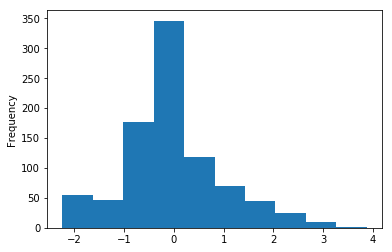

In [53]:
train_data.Age_scaled.plot.hist()

### 4.4 Binnig
连续数据离散化

In [54]:
train_data["Fare_bin"] = pd.cut(train_data.Fare, 5)

In [55]:
train_data.Fare_bin.head()

0    (-0.512, 102.466]
1    (-0.512, 102.466]
2    (-0.512, 102.466]
3    (-0.512, 102.466]
4    (-0.512, 102.466]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [56]:
# 数据量化
train_data["Fare_bin_id"] = pd.factorize(train_data.Fare_bin)[0]

In [57]:
# 哑变量
fare_bin_dummies_df = pd.get_dummies(train_data.Fare_bin).rename(columns = lambda X: "Fare_" + str(X))

In [58]:
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

In [59]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,Age_scaled,Fare_bin,Fare_bin_id,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,-0.581659,"(-0.512, 102.466]",0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0.649327,"(-0.512, 102.466]",0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,-0.273913,"(-0.512, 102.466]",0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0.418517,"(-0.512, 102.466]",0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0.418517,"(-0.512, 102.466]",0,1,0,0,0,0


## 5.特征工程

In [60]:
train_df_org = pd.read_csv("data/data.csv")
test_df_org = pd.read_csv("data/test.csv")

In [61]:
test_df_org.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
test_df_org["Survived"] = 0

In [63]:
# 整合全部数据
combined_train_test = train_df_org.append(test_df_org)
PassengerId = test_df_org.PassengerId
PassengerId.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [64]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


### 5.1 Embarked

In [65]:
# 可以看出Embarked的缺失值值不是很多，离散性数据众数填补
combined_train_test.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [66]:
combined_train_test["Embarked"].fillna(combined_train_test.Embarked.mode().iloc[0], inplace = True)

In [67]:
# 填补成功
combined_train_test.Embarked.isnull().sum()

0

In [68]:
# 数字编码
combined_train_test.Embarked = pd.factorize(combined_train_test.Embarked)[0]

In [69]:
combined_train_test.Embarked.unique()

array([0, 1, 2])

In [70]:
# 使用哑变量编码，消除特征之间的共性(参数prefix表示前缀)原则会以_1出现
embark_dummies_df = pd.get_dummies(combined_train_test.Embarked, prefix=combined_train_test[["Embarked"]].columns[0])

In [71]:
embark_dummies_df.head()

,Embarked_0,Embarked_1,Embarked_2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [72]:
combined_train_test = pd.concat([combined_train_test, embark_dummies_df], axis=1)

In [73]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,0,1,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,0,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,1,0,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,0,0


### 5.2 Sex

In [74]:
# factorize返回元组类型（value, index）
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
 
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'],prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test,sex_dummies_df],axis=1)

In [75]:
combined_train_test[["Sex"]].columns

Index(['Sex'], dtype='object')

In [76]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,1,0,0,1,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,0,1,0,0,1
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,1,0,0,0,1
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,1,0,0,0,1
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,1,0,0,1,0


### 5.3Name

In [77]:
combined_train_test["Title"] = combined_train_test.Name.map(lambda x:re.compile(",(.*?)\.").findall(x)[0])

In [78]:
combined_train_test.Title.head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title, dtype: object

In [79]:
combined_train_test.Title = combined_train_test.Title.apply(lambda x:x.strip())

In [80]:
combined_train_test.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [81]:
# 理解该函数
dict.fromkeys(["wer", "dsa"], "loip")

{'dsa': 'loip', 'wer': 'loip'}

In [82]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Male','Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))

In [83]:
title_Dict

{'Capt': 'Officer',
 'Col': 'Officer',
 'Don': 'Royalty',
 'Dona': 'Royalty',
 'Dr': 'Officer',
 'Jonkheer': 'Master',
 'Lady': 'Royalty',
 'Major': 'Officer',
 'Male': 'Miss',
 'Master': 'Master',
 'Miss': 'Miss',
 'Mme': 'Mrs',
 'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Ms': 'Mrs',
 'Rev': 'Officer',
 'Sir': 'Royalty',
 'the Countess': 'Royalty'}

In [84]:
combined_train_test.Title = combined_train_test.Title.map(title_Dict)

In [85]:
#为了后面的特征分析，这里我们也将Title特征进行factorizing
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]
title_dummies_df = pd.get_dummies(combined_train_test['Title'],prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test,title_dummies_df],axis=1)

In [86]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Sex_0,Sex_1,Title,Title_-1,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,1,0,0,0,1,0,0,0,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,1,1,0,0,1,0,0,0,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,...,0,1,2,0,0,0,1,0,0,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,1,1,0,0,1,0,0,0,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,...,1,0,0,0,1,0,0,0,0,0


In [87]:
# 增加名字长度
combined_train_test["Name_length"] = combined_train_test.Name.apply(len)

### 5.4 Fare

In [88]:
combined_train_test["Fare"] = combined_train_test[["Fare"]].fillna(combined_train_test.groupby("Pclass").transform(np.mean))

In [89]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Sex_1,Title,Title_-1,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Name_length
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,0,1,0,0,0,0,0,23
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,1,1,0,0,1,0,0,0,0,51
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,...,1,2,0,0,0,1,0,0,0,22
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,1,1,0,0,1,0,0,0,0,44
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,...,0,0,0,1,0,0,0,0,0,24


In [90]:
combined_train_test["Group_Ticket"] = combined_train_test.Fare.groupby(combined_train_test.Ticket).transform("count")

In [91]:
combined_train_test['Fare'] = combined_train_test['Fare']/combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'],axis=1,inplace=True)

In [92]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)

In [93]:
# 编码
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

# 创建哑变量
fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test,fare_bin_dummies_df],axis=1)
combined_train_test.drop(['Fare_bin'],axis=1, inplace=True)

### 5.5 PClass

In [94]:
# 可以实现不同舱体的均值评估
combined_train_test.Fare.groupby(combined_train_test.Pclass).mean()

Pclass
1    33.910500
2    11.411010
3     7.337571
Name: Fare, dtype: float64

"疑问："在这里先把PClaa这个特征不予考虑,因为前面分析可得这个特征对于生还影响作用不大，先删除试一试模型的效果。

### 5.6 Parch and SibSp
家庭成员太大或者太小，生还的可能性可能小一些

In [95]:
def family_size_category(family_size):
    """判断家庭大小"""
    if family_size <= 1:
        return "Single"
    elif family_size>4:
        return "Large_Family"
    else:
        return "Small_Family"

In [96]:
combined_train_test["Family_Size"] = combined_train_test.Parch + combined_train_test.SibSp + 1
combined_train_test.Family_Size.head()

0    2
1    2
2    1
3    2
4    1
Name: Family_Size, dtype: int64

In [97]:
# map映射（加函数）
combined_train_test["Family_Size_Category"] = combined_train_test.Family_Size.map(family_size_category)

In [98]:
# 对家庭大小进行编码
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# 编码后0, １, 2　必须是一维数据
le.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
le.classes_

array(['Large_Family', 'Single', 'Small_Family'], dtype='<U12')

In [99]:
# 编码
combined_train_test.Family_Size_Category = le.transform(combined_train_test.Family_Size_Category)

In [100]:
# 编码哑变量
family_size_dummies_df = pd.get_dummies(combined_train_test.Family_Size_Category, prefix=combined_train_test[['Family_Size_Category']].columns[0])

combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [101]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,3,0,1,...,1,0,0,0,0,2,2,0,0,1
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,1,0,0,0,2,2,0,0,1
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,3,1,0,...,0,0,1,0,0,1,1,0,1,0
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,1,0,0,0,2,2,0,0,1
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,3,0,0,...,0,0,1,0,0,1,1,0,1,0


### 5.7 Age
年龄数据连续性数值，少量时可以使用平均数来填补，算法填补解释性差,此时缺失值大

In [102]:
combined_train_test.Age.isnull().sum()

263

In [103]:
# 使用模型进行填充，此处挑选几个主要的特征变量
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

In [104]:
# 无缺失值
missing_age_train.isnull().sum()

Age                     0
Embarked                0
Sex                     0
Title                   0
Name_length             0
Family_Size             0
Family_Size_Category    0
Fare                    0
Fare_bin_id             0
Pclass                  0
dtype: int64

建立Age的预测模型，我们可以多模型预测，然后再做模型的融合，提高预测的精度

In [105]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [106]:
# 划分Train_x, Train_y, 和测试集
missing_age_x_train = missing_age_train.drop(["Age"], axis=1)
missing_age_y_train = missing_age_train.Age
missing_age_x_test = missing_age_test.drop("Age", axis=1)

In [107]:
### gbdt model 
# 网格搜索
gb_reg = GradientBoostingRegressor(random_state=42)
gbm_reg_param_grid = {'n_estimators': [2000]
                         , 'max_depth': [4]
                         , 'learning_rate': [0.01]
                         , 'max_features': [3]}
gbm_reg_grid = model_selection.GridSearchCV(gb_reg
                             , param_grid= gbm_reg_param_grid
                             , n_jobs = -1
                             , scoring='neg_mean_squared_error'
                            )

In [108]:
gbm_reg_grid.fit(missing_age_x_train, missing_age_y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite..._change=None,
               

In [109]:
gbm_reg_grid.best_score_

-131.18096279419328

In [110]:
missing_age_test.loc[:, "Age_GB"] = gbm_reg_grid.predict(missing_age_x_test)

/home/gavin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/gavin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [111]:
## model 2 
### 随机森林填补数据
rfg = RandomForestRegressor()
rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
rf_reg_grid = model_selection.GridSearchCV(rfg
                                           , rf_reg_param_grid
                                           , cv=10
                                           , n_jobs=-1
                                           , verbose=1
                                           , scoring='neg_mean_squared_error')

In [112]:
rf_reg_grid.fit(missing_age_x_train, missing_age_y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [113]:
rf_reg_grid.best_score_

-119.60819791395397

In [114]:
missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_x_test)

/home/gavin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/gavin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [115]:
missing_age_test

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass,Age_GB,Age_RF
5,NaN,2,0,0,16,1,1,8.458300,2,3,37.135923,33.519873
17,NaN,0,0,0,28,1,1,13.000000,3,2,31.783957,33.124809
19,NaN,1,1,1,23,1,1,7.225000,4,3,33.676341,34.866673
26,NaN,1,0,0,23,1,1,7.225000,4,3,28.670585,28.137377
28,NaN,2,1,2,29,1,1,7.879200,0,3,19.599251,22.495066
29,NaN,0,0,0,19,1,1,7.895800,0,3,28.874649,28.566910
31,NaN,1,1,1,46,2,2,48.840267,1,1,51.132924,41.729770
32,NaN,2,1,2,24,1,1,7.750000,0,3,24.942820,23.004190
36,NaN,1,0,0,16,1,1,7.229200,4,3,29.527716,29.312075
42,NaN,1,0,0,19,1,1,7.895800,0,3,27.383739,28.612961


In [116]:
# 使用两个模型对同一个未知年龄预测的平均值作为最后额预测结果，融合数据
missing_age_test.loc[:, "Age"] = np.mean([missing_age_test["Age_GB"] ,missing_age_test["Age_RF"]], axis=0)

/home/gavin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [117]:
missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass,Age_GB,Age_RF
5,35.327898,2,0,0,16,1,1,8.4583,2,3,37.135923,33.519873
17,32.454383,0,0,0,28,1,1,13.0000,3,2,31.783957,33.124809
19,34.271507,1,1,1,23,1,1,7.2250,4,3,33.676341,34.866673
26,28.403981,1,0,0,23,1,1,7.2250,4,3,28.670585,28.137377
28,21.047158,2,1,2,29,1,1,7.8792,0,3,19.599251,22.495066


In [118]:
missing_age_test = missing_age_test.drop(["Age_GB", "Age_RF"], axis=1)

In [119]:
# 填补缺失值
combined_train_test.loc[combined_train_test.Age.isnull(), "Age"] =  missing_age_test

In [120]:
combined_train_test.isnull().sum()

Age                          0
Cabin                     1014
Embarked                     0
Fare                         0
Name                         0
Parch                        0
PassengerId                  0
Pclass                       0
Sex                          0
SibSp                        0
Survived                     0
Ticket                       0
Embarked_0                   0
Embarked_1                   0
Embarked_2                   0
Sex_0                        0
Sex_1                        0
Title                        0
Title_-1                     0
Title_0                      0
Title_1                      0
Title_2                      0
Title_3                      0
Title_4                      0
Title_5                      0
Name_length                  0
Fare_bin_id                  0
Fare_0                       0
Fare_1                       0
Fare_2                       0
Fare_3                       0
Fare_4                       0
Family_S

### 5.9 Cabin
缺失值较大，但是其与生还率有关系，所以可以使用有无来进行区分

In [121]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), "Cabin"]  = "U0"

In [122]:
combined_train_test.Cabin = combined_train_test.Cabin.apply(lambda x: 0 if x=="U0" else 1)

In [123]:
combined_train_test.isnull().sum()

Age                       0
Cabin                     0
Embarked                  0
Fare                      0
Name                      0
Parch                     0
PassengerId               0
Pclass                    0
Sex                       0
SibSp                     0
Survived                  0
Ticket                    0
Embarked_0                0
Embarked_1                0
Embarked_2                0
Sex_0                     0
Sex_1                     0
Title                     0
Title_-1                  0
Title_0                   0
Title_1                   0
Title_2                   0
Title_3                   0
Title_4                   0
Title_5                   0
Name_length               0
Fare_bin_id               0
Fare_0                    0
Fare_1                    0
Fare_2                    0
Fare_3                    0
Fare_4                    0
Family_Size               0
Family_Size_Category      0
Family_Size_Category_0    0
Family_Size_Category

### 5.10 特征之间的相关性

In [124]:
# 挑选一些主要特征
Correlation = pd.DataFrame(combined_train_test[['Embarked','Sex','Title','Name_length','Family_Size',
                                                'Family_Size_Category','Fare','Fare_bin_id','Pclass',
                                               'Age','Cabin']])

In [125]:
[plt.cm.viridis_r]

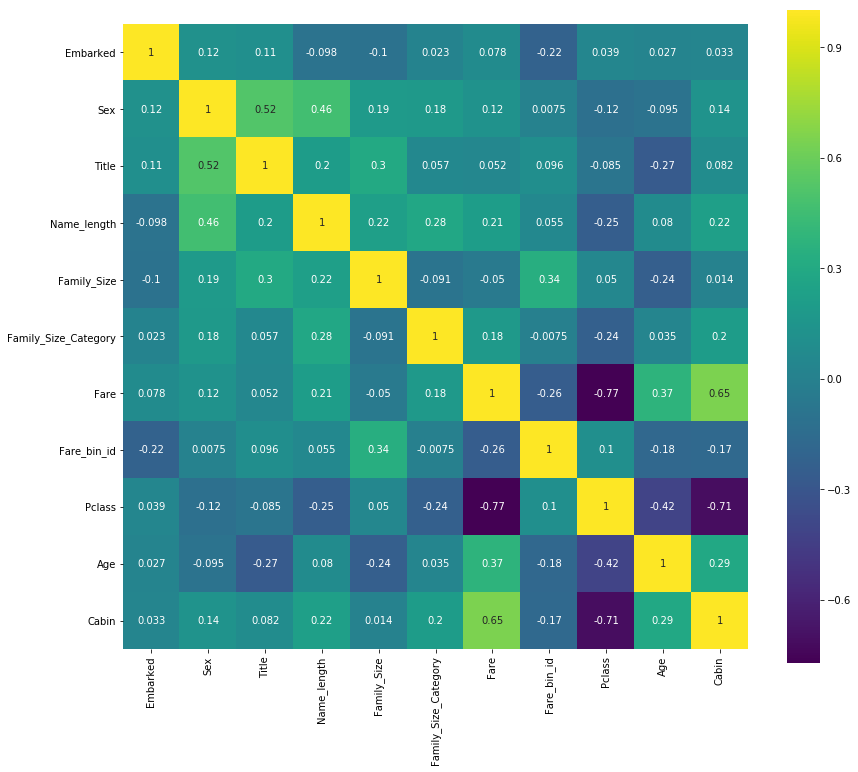

In [126]:
plt.figure(figsize=(14, 12))
sns.heatmap(Correlation.astype(float).corr()
            , square=True
            , vmax=1
#             ,  vmin=0.1
            , cmap=plt.cm.viridis
            , annot=True
           )

### 5.12输入模型前的一些处理

In [127]:
from sklearn import preprocessing
std_data = preprocessing.StandardScaler()

In [128]:
std_data.fit(combined_train_test[["Age", "Fare", "Name_length"]])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [129]:
combined_train_test[["Age", "Fare", "Name_length"]] = std_data.transform(combined_train_test[["Age", "Fare", "Name_length"]])

In [130]:
combined_train_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,-1.182315e-16,1.000382,-2.206961,-0.586255,-0.066560,0.558625,3.719790
Cabin,1309.0,2.253629e-01,0.417981,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked,1309.0,3.941940e-01,0.653499,0.000000,0.000000,0.000000,1.000000,2.000000
Fare,1309.0,-1.492737e-17,1.000382,-1.089417,-0.532029,-0.495116,0.017975,8.366405
Parch,1309.0,3.850267e-01,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
PassengerId,1309.0,6.550000e+02,378.020061,1.000000,328.000000,655.000000,982.000000,1309.000000
Pclass,1309.0,2.294882e+00,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
Sex,1309.0,3.559969e-01,0.478997,0.000000,0.000000,0.000000,1.000000,1.000000
SibSp,1309.0,4.988541e-01,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
Survived,1309.0,2.612681e-01,0.439494,0.000000,0.000000,0.000000,1.000000,1.000000


In [131]:
combined_data_backup = combined_train_test

combined_train_test.drop(['PassengerId','Embarked','Sex','Name','Fare_bin_id', 
                          'Parch','SibSp','Family_Size_Category','Ticket'],axis=1,inplace=True)

In [132]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Fare', 'Pclass', 'Survived', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4',
       'Family_Size', 'Family_Size_Category_0', 'Family_Size_Category_1',
       'Family_Size_Category_2'],
      dtype='object')

In [133]:
### 划分数据集
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

train_data_x = train_data.drop(["Survived"], axis= 1)
train_data_y = train_data["Survived"]

test_data_x = test_data.drop(["Survived"], axis = 1)

In [134]:
## 保存数据
train_data.to_csv("./data/train_data.csv")
test_data.to_csv("./data/test_data.csv")

In [135]:
# 查看是否有缺失
train_data.info()
print("*"*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 28 columns):
Age                       891 non-null float64
Cabin                     891 non-null int64
Fare                      891 non-null float64
Pclass                    891 non-null int64
Survived                  891 non-null int64
Embarked_0                891 non-null uint8
Embarked_1                891 non-null uint8
Embarked_2                891 non-null uint8
Sex_0                     891 non-null uint8
Sex_1                     891 non-null uint8
Title                     891 non-null int64
Title_-1                  891 non-null uint8
Title_0                   891 non-null uint8
Title_1                   891 non-null uint8
Title_2                   891 non-null uint8
Title_3                   891 non-null uint8
Title_4                   891 non-null uint8
Title_5                   891 non-null uint8
Name_length               891 non-null float64
Fare_0                    891 non-

## 6. 模型融合

### 6.1 选择最重要的特征

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rdf = RandomForestRegressor()
rdf.fit(train_data_x, train_data_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [138]:
a = rdf.predict(test_data_x)

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    
    #randomforest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators':[500],'min_samples_split':[2,3],'max_depth':[20]}
    rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs=25,cv=10,verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Feeatures from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    #AdaBoost
    ada_est = AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=25,cv=10,verbose=1)
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),
                                           'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Features from Ada Classifier:')
    print(str(features_top_n_ada[:10]))
    
    #ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators':[500],'min_samples_split':[3,4],'max_depth':[20]}
    et_grid = model_selection.GridSearchCV(et_est,et_param_grid,n_jobs=25,cv=10,verbose=1)
    et_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best DT Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':et_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est = GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1],'max_depth':[20]}
    gb_grid = model_selection.GridSearchCV(gb_est,gb_param_grid,n_jobs=25,cv=10,verbose=1)
    gb_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':gb_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
    dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=25,cv=10,verbose=1)
    dt_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf,features_top_n_ada,features_top_n_et,features_top_n_gb,features_top_n_dt],
                              ignore_index=True).drop_duplicates()
    features_importance = pd.concat([feature_imp_sorted_rf,feature_imp_sorted_ada,feature_imp_sorted_et,
                                     feature_imp_sorted_gb,feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n,features_importance


In [140]:
feature_to_pick = 30
feature_top_n,feature_importance = get_top_n_features(train_data_x,train_data_y,feature_to_pick)
train_data_x = pd.DataFrame(train_data_x[feature_top_n])
test_data_x = pd.DataFrame(test_data_x[feature_top_n])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   11.8s remaining:    6.3s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   12.1s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8182272159800249
Top N Features RF Train Score:0.9820426487093153
Sample 10 Feeatures from RF Classifier
0             Age
2            Fare
17    Name_length
9           Title
11        Title_0
7           Sex_0
8           Sex_1
3          Pclass
23    Family_Size
1           Cabin
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    8.7s remaining:    4.7s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    8.9s finished


Top N Features Best Ada Params:{'learning_rate': 0.1, 'n_estimators': 500}
Top N Features Best Ada Score:0.8193008739076154
Top N Features Ada Train Score:0.8451178451178452
Sample 10 Features from Ada Classifier:
0             Age
2            Fare
17    Name_length
23    Family_Size
14        Title_3
11        Title_0
8           Sex_1
12        Title_1
3          Pclass
9           Title
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    5.2s remaining:    2.8s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    5.3s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best DT Score:0.8249438202247191
Top N Features ET Train Score:0.9730639730639731
Sample 10 Features from ET Classifier:
11                   Title_0
7                      Sex_0
0                        Age
17               Name_length
8                      Sex_1
2                       Fare
3                     Pclass
1                      Cabin
24    Family_Size_Category_0
9                      Title
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   21.2s remaining:   11.4s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   21.8s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7655555555555555
Top N Features GB Train Score:0.9955106621773289
Sample 10 Feature from GB Classifier:
11                   Title_0
2                       Fare
0                        Age
17               Name_length
23               Family_Size
24    Family_Size_Category_0
3                     Pclass
9                      Title
1                      Cabin
25    Family_Size_Category_1
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Top N Features Bset DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.7711485642946317
Top N Features DT Train Score:0.9640852974186308
Sample 10 Features from DT Classifier:
11        Title_0
2            Fare
0             Age
17    Name_length
23    Family_Size
9           Title
3          Pclass
1           Cabin
18         Fare_0
5      Embarked_1
Name: 

[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.1s finished


### 6.2 可视化不同算法的筛选的特征排序

In [141]:
feature_top_n

0                        Age
1                       Fare
2                Name_length
3                      Title
4                    Title_0
5                      Sex_0
6                      Sex_1
7                     Pclass
8                Family_Size
9                      Cabin
10    Family_Size_Category_0
11    Family_Size_Category_2
12                   Title_2
13                    Fare_1
14                   Title_1
15                    Fare_4
16                Embarked_0
17                Embarked_1
18                    Fare_2
19    Family_Size_Category_1
20                    Fare_0
21                    Fare_3
22                Embarked_2
23                   Title_3
24                   Title_5
25                   Title_4
26                  Title_-1
Name: feature, dtype: object

In [142]:
feature_importance[27:27+10]

,feature,importance
27,Age,0.330
28,Fare,0.192
29,Name_length,0.178
30,Family_Size,0.052
31,Title_3,0.034
32,Title_0,0.032
33,Sex_1,0.026
34,Title_1,0.022
35,Pclass,0.020
36,Title,0.020


In [143]:
rf_feature_imp = feature_importance[:10]

# 归一化
rf_feature_importance = 100.0*(rf_feature_imp.importance / rf_feature_imp.importance.max())

# 得到索引值
rf_index = np.where(rf_feature_importance)[0]
plt.barh(ada_index, rf_feature_importance[rf_index][::-1])
plt.yticks(ada_index, rf_feature_imp.feature[::-1])

plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')
plt.show()

NameError: name 'ada_index' is not defined

In [144]:
## [::-1]倒置
rf_feature_imp.feature[::-1]

9          Cabin
8    Family_Size
7         Pclass
6          Sex_1
5          Sex_0
4        Title_0
3          Title
2    Name_length
1           Fare
0            Age
Name: feature, dtype: object

In [145]:
train_data_x.head()

,Age,Fare,Name_length,Title,Title_0,Sex_0,Sex_1,Pclass,Family_Size,Cabin,...,Embarked_1,Fare_2,Family_Size_Category_1,Fare_0,Fare_3,Embarked_2,Title_3,Title_5,Title_4,Title_-1
0,-0.586255,-0.554177,-0.434672,0,1,1,0,3,2,0,...,0,0,0,1,0,0,0,0,0,0
1,0.601620,1.541869,2.511806,1,0,0,1,1,2,1,...,1,0,0,0,0,0,0,0,0,0
2,-0.289286,-0.504344,-0.539904,2,0,0,1,3,1,0,...,0,1,1,0,0,0,0,0,0,0
3,0.378893,0.870667,1.775186,1,0,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,0.378893,-0.495116,-0.329441,0,1,1,0,3,1,0,...,0,1,1,0,0,0,0,0,0,0


In [146]:
feature_top_n.head(10)

0            Age
1           Fare
2    Name_length
3          Title
4        Title_0
5          Sex_0
6          Sex_1
7         Pclass
8    Family_Size
9          Cabin
Name: feature, dtype: object

In [147]:
feature_importance.head(10)

,feature,importance
0,Age,0.149579
1,Fare,0.130207
2,Name_length,0.127781
3,Title,0.084887
4,Title_0,0.083963
5,Sex_0,0.067822
6,Sex_1,0.065582
7,Pclass,0.045237
8,Family_Size,0.040088
9,Cabin,0.028022


### 6.3 模型融合(stacking)

In [148]:
from sklearn.model_selection import KFold
 
# Some useful parameters which will come in handy later on
ntrain = train_data_x.shape[0]
ntest = test_data_x.shape[0]
SEED = 0 #for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS,random_state=SEED,shuffle=False)

/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [149]:
def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    # 存放K折结果
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i, (train_index,test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr,y_tr)
        
        # 填充所有的测试结果的值
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
    
    # k折平均
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

#### 创建次学习器

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
rf = RandomForestClassifier(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
 
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
 
et = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,max_depth=8,min_samples_leaf=2,verbose=0)
 
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,max_depth=5,verbose=0)
 
dt = DecisionTreeClassifier(max_depth=8)
 
knn = KNeighborsClassifier(n_neighbors=2)
 
svm = SVC(kernel='linear',C=0.025)

In [151]:
x_train = train_data_x.values   #Creates an array of the train data
x_test = test_data_x.values   #Creates an array of the test data
y_train = train_data_y.values

In [152]:
rf_oof_train,rf_oof_test = get_out_fold(rf,x_train,y_train,x_test)  # Random Forest
ada_oof_train,ada_oof_test = get_out_fold(ada,x_train,y_train,x_test)  # AdaBoost
et_oof_train,et_oof_test = get_out_fold(et,x_train,y_train,x_test)  # Extra Trees
gb_oof_train,gb_oof_test = get_out_fold(gb,x_train,y_train,x_test)  # Gradient Boost
dt_oof_train,dt_oof_test = get_out_fold(dt,x_train,y_train,x_test)  #Decision Tree
knn_oof_train,knn_oof_test = get_out_fold(knn,x_train,y_train,x_test)  # KNeighbors
svm_oof_train,svm_oof_test = get_out_fold(svm,x_train,y_train,x_test)  # Support Vector
 
print("Training is complete")

/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/gavin/anaconda3/lib/python3.6/

Training is complete


In [153]:
x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train,dt_oof_train,knn_oof_train,svm_oof_train),axis=1)
x_test =np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test,dt_oof_test,knn_oof_test,svm_oof_test),axis=1)
x_train.shape

(891, 7)

In [278]:
sdxtrain = xgb.DMatrix(x_train, y_train)
sdctest = xgb.DMatrix(x_test)

In [290]:
## 交差验证（分类性的特征）
# 初始的调参结果(全部使用默认值)
param1 = {'silent':False #并非默认
        ,'obj':'binary:logistic' #并非默认
        ,"subsample":1
        ,"max_depth":6
        ,"eta":0.3
        ,"gamma":0
        ,"lambda":1
        ,"alpha":0
        ,"colsample_bytree":1
        ,"colsample_bylevel":1
        ,"colsample_bynode":1
        ,"nfold":5
         }
num_round = 200

In [334]:
print("The time of param１:")
t0 = time()
cvresult = xgb.cv(params=param1, dtrain=sdxtrain, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

# 上一次的调参结果
param2 = {'silent':True
          ,'obj':'binary:logistic'
          ,"nfold":5
#           , "eta":0.01
#           , "max_depth":2
            , "gamma":1.9
         }

# 现在的调参结果
param3 = {'silent':True
          ,'obj':'binary:logistic'
          ,"nfold":5
#           , "eta":0.1
#           , "max_depth":8
          
          , "gamma":1.9
#           ,"colsample_bytree":0.7
         }

t0 = time()
print("The time of param2:")
cvresult2 = xgb.cv(params=param2, dtrain=sdxtrain, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

print("The time of param3:")
t0 = time()
cvresult3 = xgb.cv(params=param3, dtrain=sdxtrain, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

The time of param１:
00:00:177788
The time of param2:
00:00:335010
The time of param3:
00:00:284201


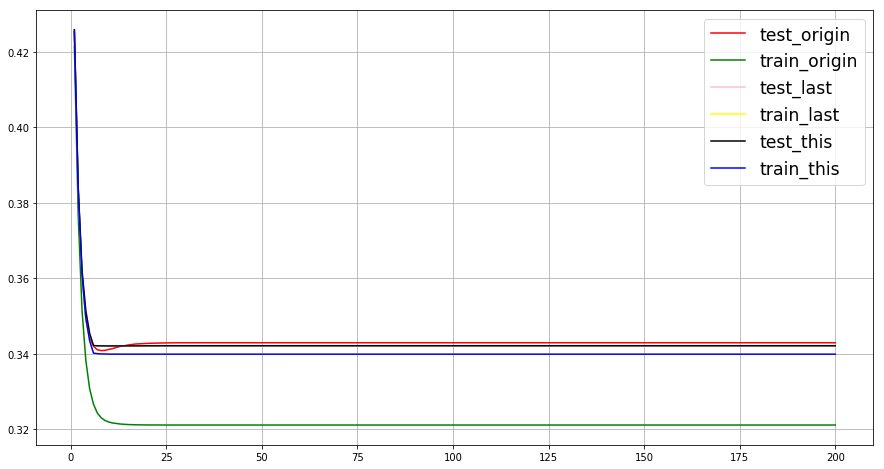

In [335]:
#　调整参数后的效果
fig, ax = plt.subplots(1, figsize=(15, 8))
ax.grid()
end = num_round + 1
ax.plot(range(1, end), cvresult.iloc[:, 0], c="red",label="test_origin")
ax.plot(range(1, end), cvresult.iloc[:, 2], c="green", label="train_origin")
ax.plot(range(1, end), cvresult2.iloc[:, 0], c="pink",label="test_last")
ax.plot(range(1, end), cvresult2.iloc[:, 2], c="yellow", label="train_last")
ax.plot(range(1, end), cvresult3.iloc[:, 0], c="black",label="test_this")
ax.plot(range(1, end), cvresult3.iloc[:, 2], c="blue", label="train_this")
ax.legend(fontsize = "xx-large")
ax.set_ylim()
plt.show()

In [333]:
# from xgboost import XGBClassifier
 
# gbm = XGBClassifier(n_estimators=200,max_depth=4,min_child_weight=2,gamma=0.9,subsample=0.8,
#                     colsample_bytree=0.8,objective='binary:logistic',nthread=-1,scale_pos_weight=1).fit(x_train,y_train)
# predictions1 = gbm.predict(x_test)

In [341]:
xgb_model = xgb.train(params=param2, dtrain=sdxtrain, num_boost_round=num_round)
pred = xgb_model.predict(sdctest)
predictions1 = pred.copy()
predictions1[pred > 0.5] = 1
predictions1[pred <= 0.5] = 0
predictions1 = predictions1.astype("int")

In [342]:
StackingSubmission = pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions1})

StackingSubmission.to_csv('./data/StackingSubmission.csv',index=False,sep=',')

### ７．xgboost

In [343]:
import xgboost as xgb
import datetime
from time import time

In [344]:
train_data = pd.read_csv("data/train_data.csv",index_col=0)
test_data = pd.read_csv('data/test_data.csv', index_col=0)

In [345]:
train_data_x = train_data.loc[:, train_data.columns != "Survived"]

In [346]:
train_data_x.head()

,Age,Cabin,Fare,Pclass,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,Title,...,Name_length,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Family_Size,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
0,-0.586255,0,-0.554177,3,1,0,0,1,0,0,...,-0.434672,1,0,0,0,0,2,0,0,1
1,0.601620,1,1.541869,1,0,1,0,0,1,1,...,2.511806,0,1,0,0,0,2,0,0,1
2,-0.289286,0,-0.504344,3,1,0,0,0,1,2,...,-0.539904,0,0,1,0,0,1,0,1,0
3,0.378893,1,0.870667,1,1,0,0,0,1,1,...,1.775186,0,1,0,0,0,2,0,0,1
4,0.378893,0,-0.495116,3,1,0,0,1,0,0,...,-0.329441,0,0,1,0,0,1,0,1,0


In [347]:
train_data_y = train_data.loc[:, "Survived"]

In [348]:
test_data_x = test_data.copy()

In [349]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 28 columns):
Age                       891 non-null float64
Cabin                     891 non-null int64
Fare                      891 non-null float64
Pclass                    891 non-null int64
Survived                  891 non-null int64
Embarked_0                891 non-null int64
Embarked_1                891 non-null int64
Embarked_2                891 non-null int64
Sex_0                     891 non-null int64
Sex_1                     891 non-null int64
Title                     891 non-null int64
Title_-1                  891 non-null int64
Title_0                   891 non-null int64
Title_1                   891 non-null int64
Title_2                   891 non-null int64
Title_3                   891 non-null int64
Title_4                   891 non-null int64
Title_5                   891 non-null int64
Name_length               891 non-null float64
Fare_0                    891 non-

In [350]:
## 装换数据类型
dtrain = xgb.DMatrix(train_data_x, train_data_y)
dtest = xgb.DMatrix(test_data_x.loc[:, test_data_x.columns != "Survived"])

In [628]:
## 交差验证（分类性的特征）
# 初始的调参结果(全部使用默认值)
param1 = {'silent':False #并非默认
        ,'obj':'binary:logistic' #并非默认
        ,"subsample":1
        ,"max_depth":6
        ,"eta":0.3
        ,"gamma":0
        ,"lambda":1
        ,"alpha":0
        ,"colsample_bytree":1
        ,"colsample_bylevel":1
        ,"colsample_bynode":1
        ,"nfold":5
         }
num_round = 600

In [830]:
print("The time of param１:")
t0 = time()
cvresult = xgb.cv(params=param1, dtrain=dtrain, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

# 上一次的调参结果
param2 = {'silent':True
          ,'obj':'binary:logistic'
          ,"nfold":5
          , "gamma":2.5
          , "max_depth":3
#           , "eta":0.0
#           , "max_depth":2
#           ,"alpha":1.5
#            ,"colsample_bytree":0.5
          ,"colsample_bylevel":0.65
         }

# 现在的调参结果
param3 = {'silent':True
          ,'obj':'binary:logistic'
          ,"nfold":5
#           , "eta":0.25
          , "max_depth":3
          , "gamma":2.5
#         ,"lambda":20
#         ,"alpha":20
#           ,"colsample_bytree":0.8
          ,"colsample_bylevel":0.65
#           ,"colsample_bynode":0.
          
         }

t0 = time()
print("The time of param2:")
cvresult2 = xgb.cv(params=param2, dtrain=dtrain, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

print("The time of param3:")
t0 = time()
cvresult3 = xgb.cv(params=param3, dtrain=dtrain, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

The time of param１:
00:01:122294
The time of param2:
00:00:866203
The time of param3:
00:00:888369


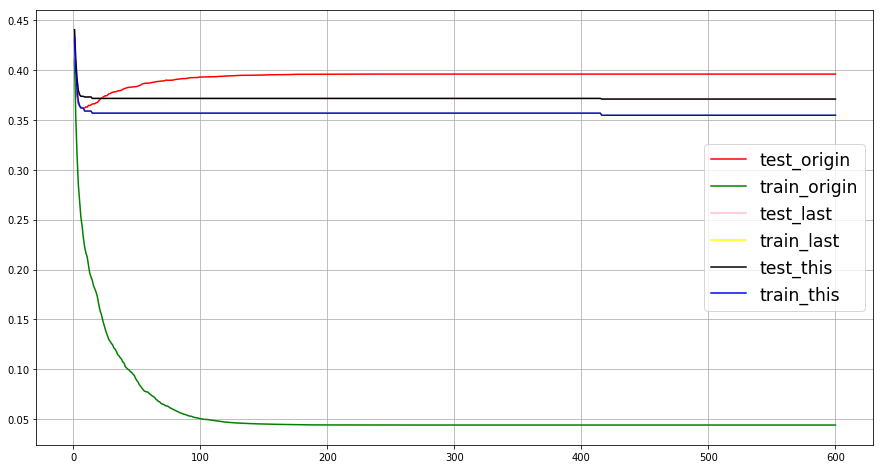

In [836]:
#　调整参数后的效果
fig, ax = plt.subplots(1, figsize=(15, 8))
ax.grid()
end = num_round + 1
ax.plot(range(1, end), cvresult.iloc[:, 0], c="red",label="test_origin")
ax.plot(range(1, end), cvresult.iloc[:, 2], c="green", label="train_origin")
ax.plot(range(1, end), cvresult2.iloc[:, 0], c="pink",label="test_last")
ax.plot(range(1, end), cvresult2.iloc[:, 2], c="yellow", label="train_last")
ax.plot(range(1, end), cvresult3.iloc[:, 0], c="black",label="test_this")
ax.plot(range(1, end), cvresult3.iloc[:, 2], c="blue", label="train_this")
ax.legend(fontsize = "xx-large")
ax.set_ylim()
plt.savefig("./imgs/cv.svg")
plt.show()

In [832]:
xgb_model = xgb.train(params=param2, dtrain=dtrain, num_boost_round=num_round)

In [833]:
pred = xgb_model.predict(dtest)
predictions = pred.copy()
predictions[pred > 0.5] = 1
predictions[pred <= 0.5] = 0
predictions = predictions.astype("int")

In [834]:
XgboostSubmission = pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions})
XgboostSubmission.to_csv('./data/XgboostSubmission.csv',index=False,sep=',')

## 参考
[泰坦尼克号乘客获救预测](https://tianchi.aliyun.com/notebook-ai/detail?postId=6772)  

[机器学习系列(3)_逻辑回归应用之Kaggle泰坦尼克之灾](https://blog.csdn.net/han_xiaoyang/article/details/49797143)  

[特征工程](https://www.zhihu.com/question/29316149)  

[数据挖掘竞赛利器-Stacking和Blending方式](https://blog.csdn.net/maqunfi/article/details/82220115)

### 知识点的疑问

1. map和apply的区别？  
2. 协方差矩阵的意义？

In [1]:
import numpy as np

In [2]:
a = np.array([[1, 2], [3, 4]])

In [3]:
a

array([[1, 2],
       [3, 4]])

In [5]:
a.mean(axis=0)

array([2., 3.])

In [8]:
np.zeros((100,))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])